# Modeling

**Instructions**
 1. Select a dataset with a continuous target variable.

 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

## Imports

Below are libraries we need for this file. 

In [2]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Imports for Zillow Data
from wrangle import wrangle_zillow
from prepare import split_data
from prepare import add_scaled_columns

## Load Dataset

I am going to use the `Zillow` dataset. My target variable will be the `taxvaluedollarcount` column, which is a continuous, numeric variable.

To obtain our DataFrame, we use the `wrangle_zillow` function 

In [3]:
zillow = wrangle_zillow()

In [4]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


## Prepare Data

We must verify that the data has:
 - all numeric types, and 
 - no missing values.

### Check for Numeric Types

In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047697 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 125.0 MB


All our columns are numeric!

### Check for Null Values

In [6]:
for column in zillow:
    print(zillow[column].isnull().value_counts())

False    2047697
Name: bedroomcnt, dtype: int64
False    2047697
Name: bathroomcnt, dtype: int64
False    2047697
Name: calculatedfinishedsquarefeet, dtype: int64
False    2047697
Name: taxvaluedollarcnt, dtype: int64
False    2047697
Name: yearbuilt, dtype: int64
False    2047697
Name: taxamount, dtype: int64
False    2047697
Name: fips, dtype: int64


Since False is the only result of `isnull` for all or columns, we have no null values in our DataFrame!

### Split the Data

First we will split the data into `train`, `validate`, and `test`.

In [38]:
train, validate, test = split_data(zillow)

### Scale the Data

We use the `add_scaled_columns` function from the `prepare` file.

In [39]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train, validate, test)

In [42]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled
1562981,4.0,3.0,2306.0,618000.0,1988.0,7692.16,6037.0,0.464343,0.6,0.545455
1703392,2.0,1.0,1314.0,84938.0,1951.0,1794.55,6037.0,0.264504,0.2,0.181818
1243403,4.0,3.0,2902.0,680217.0,1964.0,8313.32,6037.0,0.584408,0.6,0.545455
988579,4.0,2.5,2474.0,524060.0,1977.0,5972.20,6059.0,0.498187,0.6,0.454545
403841,3.0,2.0,1624.0,506374.0,1952.0,6290.72,6037.0,0.326954,0.4,0.363636


In [49]:
non_target_columns = ['bedroomcnt_scaled',
     'bathroomcnt_scaled',
     'calculatedfinishedsquarefeet_scaled',
     'yearbuilt',
     'fips']

In [50]:
X_train = train_scaled[non_target_columns]
X_validate = validate_scaled[non_target_columns]
X_test = test_scaled[non_target_columns]

y_train = train_scaled.taxvaluedollarcnt
y_validate = validate_scaled.taxvaluedollarcnt
y_test = test_scaled.taxvaluedollarcnt

In [52]:
X_train.head()

,bedroomcnt_scaled,bathroomcnt_scaled,calculatedfinishedsquarefeet_scaled,yearbuilt,fips
1562981,0.6,0.545455,0.464343,1988.0,6037.0
1703392,0.2,0.181818,0.264504,1951.0,6037.0
1243403,0.6,0.545455,0.584408,1964.0,6037.0
988579,0.6,0.454545,0.498187,1977.0,6059.0
403841,0.4,0.363636,0.326954,1952.0,6037.0


## Modeling

### Baseline

In [53]:
#Convert to DataFrame
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [56]:
# Predict taxvaluedollarcnt_pred_mean
taxvaluedollarcnt_pred_mean = y_train.taxvaluedollarcnt.mean()
y_train['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean
y_validate['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean

In [57]:
# compute taxvaluedollarcnt_pred_median
taxvaluedollarcnt_pred_median = y_train.taxvaluedollarcnt.median()
y_train['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median
y_validate['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median

In [58]:
# 3. RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean) ** (1/2)

In [59]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  263192.54 
Validate/Out-of-Sample:  262483.65
RMSE using Median
Train/In-Sample:  269516.45 
Validate/Out-of-Sample:  268790.94


### LinearRegression (OLS)

In [60]:
y_train.head()

,taxvaluedollarcnt,taxvaluedollarcnt_pred_mean,taxvaluedollarcnt_pred_median
1562981,618000.0,373761.418772,315720.0
1703392,84938.0,373761.418772,315720.0
1243403,680217.0,373761.418772,315720.0
988579,524060.0,373761.418772,315720.0
403841,506374.0,373761.418772,315720.0


In [62]:
# create the model object

lm = LinearRegression(normalize=True)

In [63]:
# fit the model to our training data. W

lm.fit(X_train, y_train.taxvaluedollarcnt)

LinearRegression(normalize=True)

In [64]:
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

In [65]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  218985.4696830617 
Validation/Out-of-Sample:  218949.95662663865


### LassoLars

In [67]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  218985.4696830617 
Validation/Out-of-Sample:  218949.95662663865


### TweedieRegressor (GLM)

In [91]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0.5)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0.5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0.5
Training/In-Sample:  263192.5391545025 
Validation/Out-of-Sample:  263192.5391545025


### PolynomialFeatures

In [70]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

### LinearRegression

In [71]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  216348.05795043064 
Validation/Out-of-Sample:  46776723826.4567


## Evaluation

### Plotting Actual vs. Predicted Values

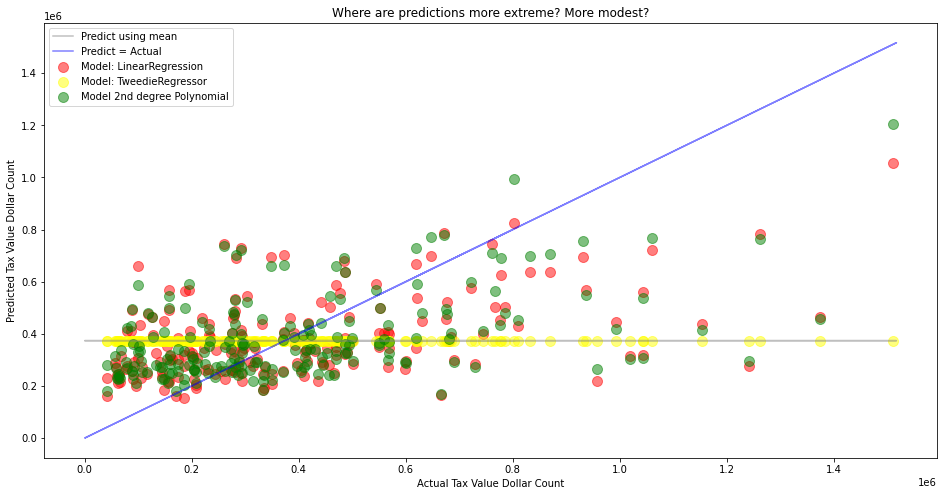

In [92]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean, alpha=.5, color="gray", label='Predict using mean')
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='Predict = Actual')

plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm[0:200], 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_glm[0:200], 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm2[0:200], 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value Dollar Count")
plt.ylabel("Predicted Tax Value Dollar Count")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

### Residual Plots: Plotting the Errors in Predictions

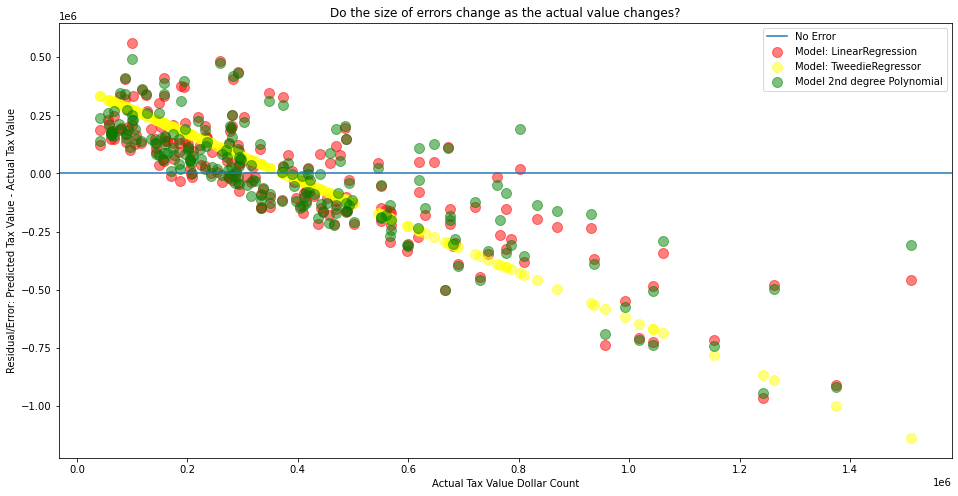

In [93]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm[0:200]-y_validate.taxvaluedollarcnt[0:200], 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_glm[0:200]-y_validate.taxvaluedollarcnt[0:200], 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm2[0:200]-y_validate.taxvaluedollarcnt[0:200], 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value Dollar Count")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

### Histograms

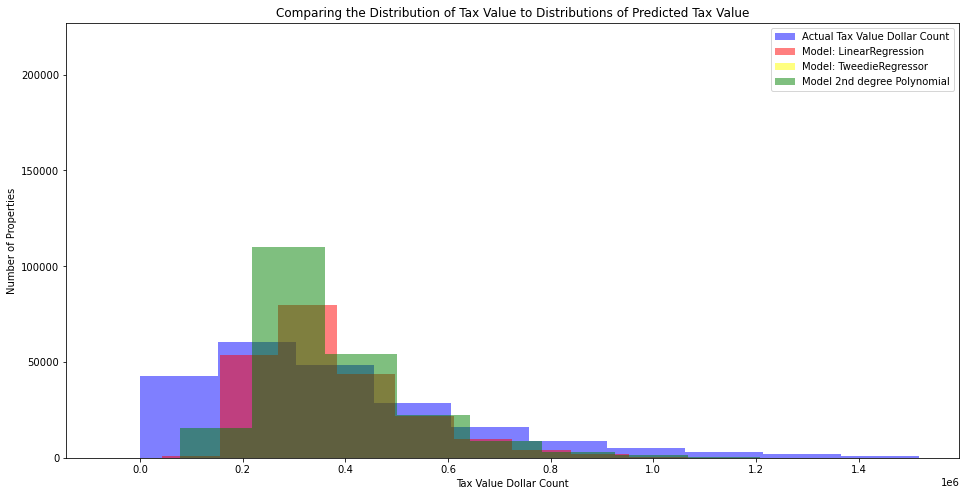

In [89]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Value Dollar Count")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value Dollar Count")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Tax Value to Distributions of Predicted Tax Value")
plt.legend()
plt.show()

### Model Selection & Out-of-Sample Evaluation

We select the LinearRegression model.

In [98]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['taxvaluedollarcnt_pred_lm'] = lm.predict(X_test)

In [99]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_lm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  218846.84867016214
